In [1]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import circle_fit as cf
%matplotlib inline

Question 01

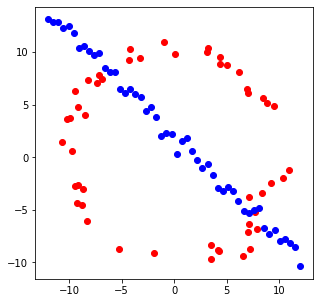

In [7]:
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(X[:50,0],X[:50,1],'o',color='red')
ax.plot(X[50:,0],X[50:,1],'o',color='blue')
ax.set_aspect('equal')

plt.show()

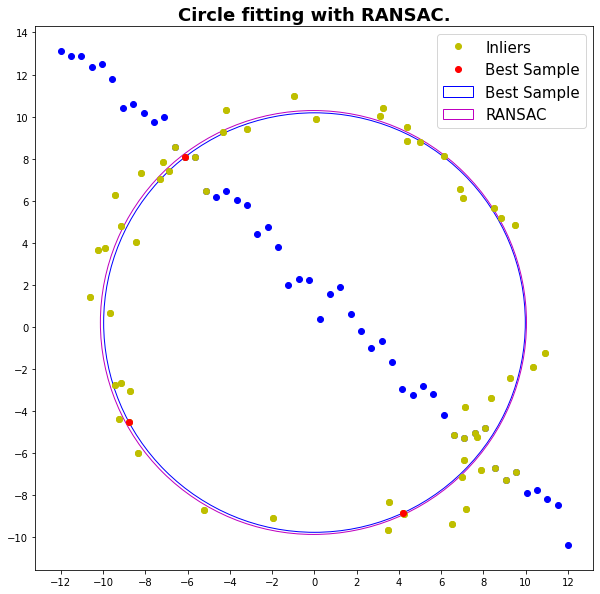

In [8]:
def est_circle(m, n, p):
    d_1 = ( (m[0] - n[0]) * (n[1] - p[1]) - (n[1] - m[1]) * (p[0] - n[0]) )
    d_2 = ( (m[0] - n[0]) * (n[1] - p[1]) - (n[1] - m[1]) * (p[0] - n[0]) )

    if d_1 != 0 and d_2 != 0:
        a = 0.5 * ( (n[1] - p[1]) * (m[0]**2 + m[1]**2 - n[0]**2 - n[1]**2) + (n[1] - m[1]) * (n[0]**2 + n[1]**2 - p[0]**2 - p[1]**2) ) / d_1
        b = 0.5 * ( (m[0] - n[0]) * (n[0]**2 + n[1]**2 - p[0]**2 - p[1]**2) + (p[0] - n[0]) * (m[0]**2 + m[1]**2 - n[0]**2 - n[1]**2) ) / d_2
        c = -p[0]**2 - p[1]**2 + 2*a*p[0] + 2*b*p[1]
        r = (a**2 + b**2 - c)**0.5

    return a, b, r

def draw_circle(m, n, p):
    a, b, r = est_circle(m, n, p)
    circle = plt.Circle((a, b), r, color='b', fill=False)
    return circle

def inlier_cnt(a, b, r, X, t):
    cnt = 0
    best_inliers = None

    for i in range(X.shape[0]):
        d = abs( ( (X[i,0] - a)**2 + (X[i,1] - b)**2 ) ** 0.5 - r )
        if d < t:
            cnt += 1
            if type(best_inliers) == type(None):
                best_inliers = np.array([X[i,:]])
            else:
                best_inliers = np.concatenate((best_inliers, X[i,:].reshape(1, -1)), axis=0)
    
    return cnt, best_inliers

def RANSAC_circle(X):
    s,t,d,N = 3, 1.96, 50, 35
    best_circle = None
    best_x = None
    best_in_cnt = 0

    #Get random 3 points from data to estimate the circle
    
    for i in range(N):
        pt = []
        for j in range(s):
            h_on = X[np.random.randint(0, 100), :]
            
            if len(pt) == 0:
                pt.append(h_on)
            elif np.array_equal(h_on, pt[-1]):                
                while np.array_equal(h_on, pt[-1]):
                    h_on = X[np.random.randint(0, 100), :]            
                    pt.append(h_on)
            else:
                pt.append(h_on)       
        a, b, r = est_circle(pt[0], pt[1], pt[2])
        if a == None:
            continue
        cnt, inliers = inlier_cnt(a, b, r, X, t)
        
        #Draw ransac circle

        if cnt > best_in_cnt:
            best_circle = plt.Circle((a, b), r, color='b', fill=False, label="Best Sample")
            best_pt = pt
            best_inliers = inliers
            best_in_cnt = cnt

    xc,yc,r,_ = cf.least_squares_circle(best_inliers)

    #Draw least square circle
    
    ransac_circle = plt.Circle((xc, yc), r, color='m', fill=False, label="RANSAC")
    
    return ransac_circle, best_circle, best_pt, best_inliers

ransac_circle, best_circle, best_pt, best_inliers = RANSAC_circle(X)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(X_circ[:,0], X_circ[:,1], color="y")
ax.scatter(X_line[:,0], X_line[:,1], color="b")

for point in best_inliers:
    if np.array_equal(point, best_inliers[-1]):
        ax.plot(point[0], point[1], 'yo', label="Inliers")
    else:
        ax.plot(point[0], point[1], 'yo')


for point in best_pt:
    if np.array_equal(point, best_pt[-1]):
        ax.plot(point[0], point[1], 'ro', label="Best Sample")
    else:
        ax.plot(point[0], point[1], 'ro')
        
        
labelx = [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12]
labely = [-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14]
ax.add_patch(best_circle)
ax.add_patch(ransac_circle)
ax.set_title("Circle fitting with RANSAC.",fontweight ="bold",fontsize = 18)
ax.set_xticks(labelx)
ax.set_yticks(labely)
ax.legend(loc="upper right", prop={'size': 15})
plt.show()

Question 02

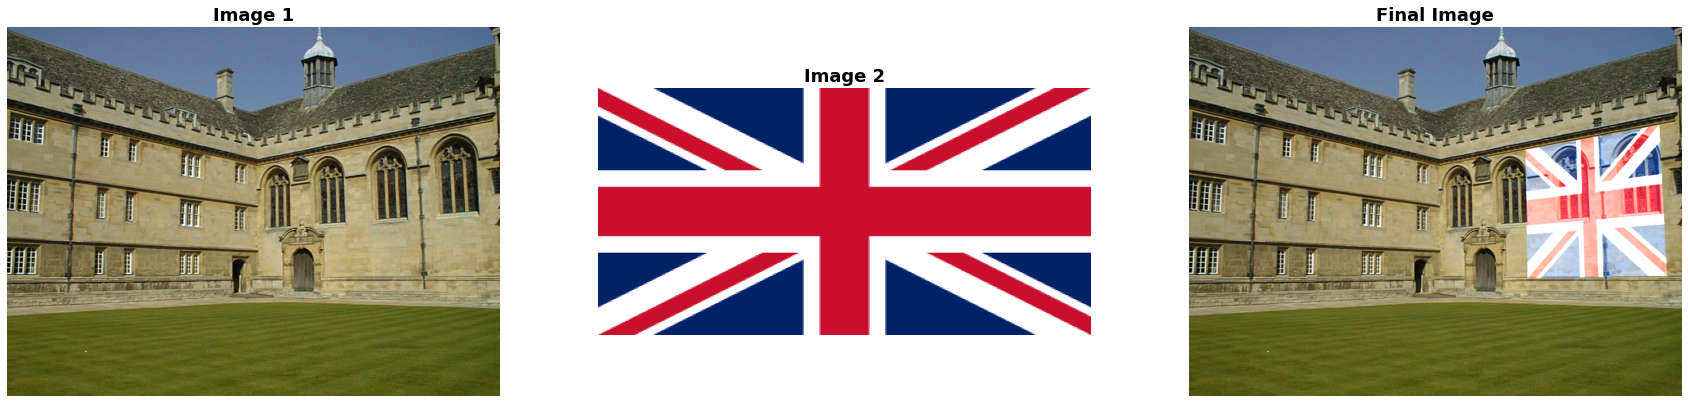

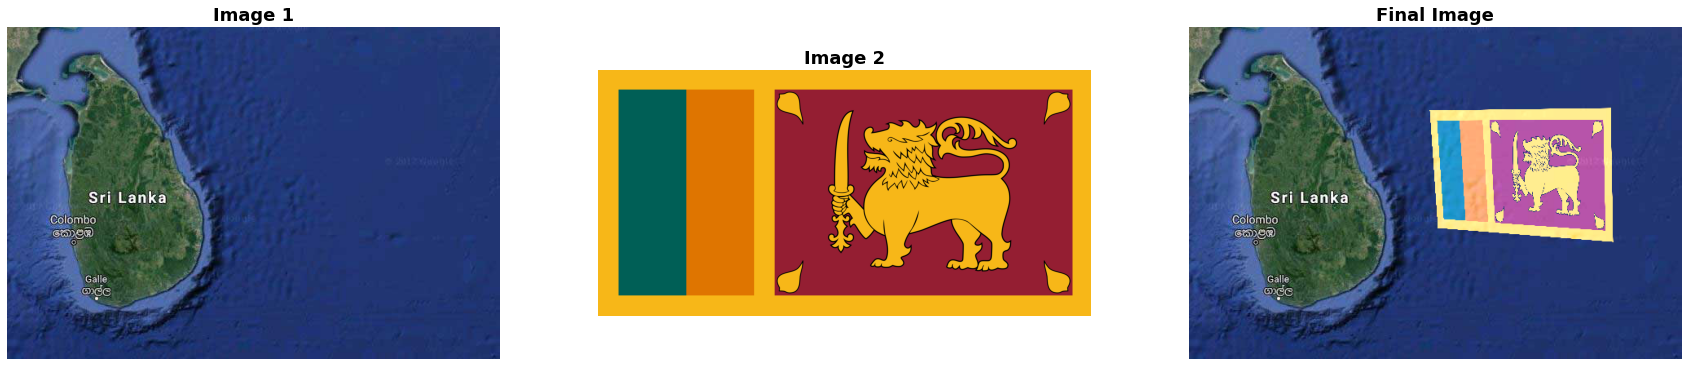

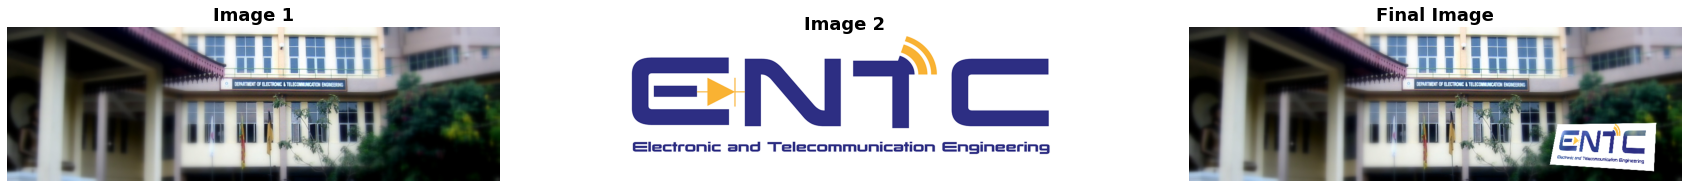

In [10]:
images = [cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\images\Wadham College.jpg"),cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\Sri-Lanka-Map.png"), cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\ENTC.png")]
images2 = [cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\Flag_of_the_United_Kingdom.svg.png"),cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\Flag_of_Sri_Lanka.svg.png"), cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\ENTC LOGO.png")]
for i in range(3):

    im = images[i]
    im2 = images2[i]
    cordinates = []
    def click(event, x, y, flags, params):
        if event == cv.EVENT_LBUTTONDOWN:
            cordinates.append([x,y])
        

    cv.imshow('image', im)
    cv.setMouseCallback('image', click)
    cv.waitKey(0)
    cv.destroyAllWindows()

    h, w = np.shape(im)[0], np.shape(im)[1]
    zeros = np.array([[0],[0],[0]])

    for i in range (4):
        for j in range (2):
            globals()[["x","y"][j]+"_dash_"+str(i+1)] = cordinates[i][j]
            
    flag_h , flag_w = np.shape(im2)[0] , np.shape(im2)[1]

    x1T = np.array([[0,0,1]])
    x2T = np.array([[flag_w-1, 0,1]])
    x3T = np.array([[flag_w-1, flag_h-1, 1]])
    x4T = np.array([[0,flag_h-1,1]])

    for i in range(4):
        a = np.concatenate((zeros.T,globals()["x"+str(i+1)+"T"], -globals()["y_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
        b = np.concatenate((globals()["x"+str(i+1)+"T"],zeros.T, -globals()["x_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
        if i==0:
            A=np.concatenate((a,b), axis=0, dtype = np.float32)
        else:
            A=np.concatenate((A,a,b), axis=0, dtype = np.float32)
            
    W,V = np.linalg.eig((A.T)@A)
    temp = V[:, np.argmin(W)]
    H = temp.reshape((3,3))

    flag_trans = cv.warpPerspective(im2, H,(w,h))
    final_output = cv.add(flag_trans,im)

    fig, ax = plt.subplots(1,3,figsize=(30,30))
    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].set_title("Image 1",fontweight ="bold",fontsize = 18)
    ax[0].axis("off")

    ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
    ax[1].set_title("Image 2",fontweight ="bold",fontsize = 18)
    ax[1].axis("off")

    ax[2].imshow(cv.cvtColor(final_output, cv.COLOR_BGR2RGB))
    ax[2].set_title("Final Image",fontweight ="bold",fontsize = 18)
    ax[2].axis("off")
    plt.show()

Question 03

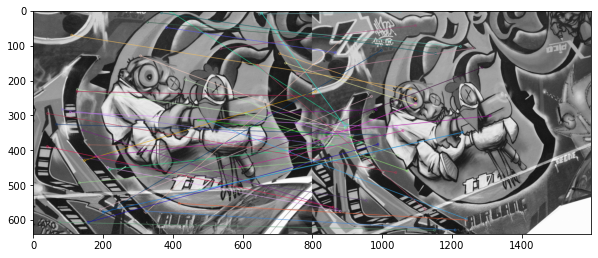

In [11]:
img1_original = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\graf\img1.ppm")
img5_original = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\graf\img5.ppm")
img2 = cv.cvtColor(cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\graf\img2.ppm"), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\graf\img3.ppm"), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 02\graf\img4.ppm"), cv.COLOR_BGR2GRAY)

img1 = cv.cvtColor(img1_original, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5_original, cv.COLOR_BGR2GRAY)

images = [img1, img2, img3, img4, img5]

sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_5, descriptors_5 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_5)
matches = sorted(matches, key = lambda x:x.distance)
Matched = cv.drawMatches(img1, keypoints_1, img2, keypoints_5, matches[:50], img5, flags=2)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Matched)
plt.show()

In [12]:
def randomN(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)): m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m): return l
    else: return randomN(n,t)

def compute_homography(from_pt, to_pt):
    
    x1, y1, x2, y2, x3, y3, x4, y4 = to_pt[0], to_pt[1], to_pt[2], to_pt[3], to_pt[4], to_pt[5], to_pt[6], to_pt[7]
    x1T, x2T, x3T, x4T = from_pt[0], from_pt[1], from_pt[2], from_pt[3]
    zero_matrix = np.array([[0],[0],[0]])
    
    a = np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis=1)
    b = np.concatenate((x1T,zero_matrix.T, -x1*x1T), axis=1)

    c = np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis=1)
    d = np.concatenate((x2T,zero_matrix.T, -x2*x2T), axis=1)

    e = np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis=1)
    f = np.concatenate((x3T,zero_matrix.T, -x3*x3T), axis=1)

    g = np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis=1)
    h = np.concatenate((x4T,zero_matrix.T, -x4*x4T), axis=1)

    A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)


    A_transpose_times_A = (A.T)@A
    W,V = np.linalg.eig(A_transpose_times_A)
    temph = V[:, np.argmin(W)]
    H = temph.reshape((3,3))
    return H 

In [13]:
p,s,e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

H_vals = []
for t in range(4):
    sift = cv.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(images[t],None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(images[t+1],None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    list_keypoints_1 = [keypoints_1[mat.queryIdx].pt for mat in matches] 
    list_keypoints_2 = [keypoints_2[mat.trainIdx].pt for mat in matches]

    threshold, best_inliers, best_H = 2, 0, 0

    for k in range(N):
        four_random_points = randomN(len(list_keypoints_1)-1,4)

        fromPoints = []
        for i in range(4): fromPoints.append(np.array([[list_keypoints_1[four_random_points[i]][0], list_keypoints_1[four_random_points[i]][1], 1]]))

        toPoints = []
        for j in range(4): 
            toPoints.append(list_keypoints_2[four_random_points[j]][0])
            toPoints.append(list_keypoints_2[four_random_points[j]][1])
        
        H = compute_homography(fromPoints, toPoints)
        
        inliers = 0
        for i in range(len(list_keypoints_1)):
            X = [list_keypoints_1[i][0], list_keypoints_1[i][1], 1]
            hX = H@X
            hX /= hX[-1]
            error = np.sqrt(np.power(hX[0]-list_keypoints_2[i][0],2) + np.power(hX[1]-list_keypoints_2[i][1],2))
            if error < threshold: inliers+=1
        
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H

    H_vals.append(best_H)

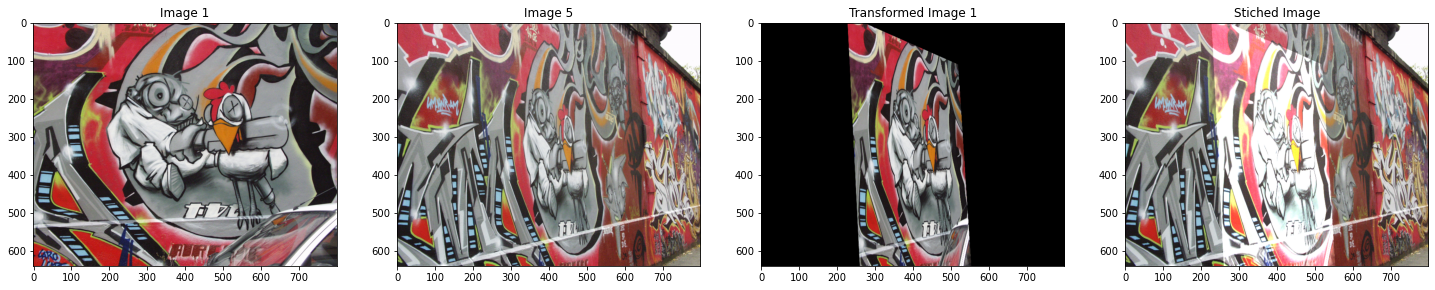

In [14]:
H_1_to_5 = H_vals[3] @ H_vals[2] @ H_vals[1] @ H_vals[0]
H_1_to_5 /= H_1_to_5[-1][-1]

transformed = cv.warpPerspective(img1_original, H_1_to_5 ,(np.shape(img5_original)[1] ,np.shape(img5_original)[0]))

fig, ax = plt.subplots(1,4,figsize=(25,25))
ax[0].imshow(cv.cvtColor(img1_original,cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5_original,cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed Image 1")
output = cv.add(img5_original,transformed)
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ;  ax[3].set_title("Stiched Image")
plt.show()